# Term Project: Data Preparation And Analysis For Washington D.C Properties
# Total Points: 60

## Instructions: 

1) Rename this .ipynb file with your first and last name (For Both Team members)

2) Complete the project info form

3) Answer all the questions

4) Upload this file into Canvas as your submisison file for the project


** The CSV Dataset File 'DC_Properties.csv' is Eclosed with This .ipynb file **



# Complete the file info form:

Date:---12/11/2023---------------------


## Dataset Attribute Description

- BATHRM - Number of Full Bathrooms
- HF_BATHRM - Number of Half Bathrooms (no bathtub or shower)
- HEAT - Heating
- AC - Cooling
- NUM_UNITS - Number of Units
- ROOMS - Number of Rooms
- BEDRM - Number of Bedrooms
- AYB - The earliest time the main portion of the building was built
- YR_RMDL - Year structure was remodeled
- EYB - The year an improvement was built more recent than actual year built
- STORIES - Number of stories in primary dwelling
- SALEDATE - Date of most recent sale
- PRICE - Price of most recent sale
- QUALIFIED - Qualified
- SALE_NUM - Sale Number
- GBA - Gross building area in square feet
- BLDG_NUM - Building Number on Property
- STYLE - Structure style in regard to stories
- STRUCT - Structure type
- GRADE - Structural Grade
- CNDTN - Condition
- EXTWALL - Extrerior wall type
- ROOF - Roof type
- INTWALL - Interior wall
- KITCHENS - Number of kitchens
- FIREPLACES - Number of fireplaces
- USECODE - Property use code
- LANDAREA - Land area of property in square feet
- GIS_LAST_MOD_DTTM - Last Modified Date
- SOURCE - Raw Data Source
- CMPLX_NUM - Complex number
- LIVING_GBA - Gross building area in square feet
- FULLADDRESS - Full Street Address
- CITY - City
- STATE - State
- ZIPCODE - Zip Code
- NATIONALGRID - Address location national grid coordinate spatial address
- LATITUDE - Latitude
- LONGITUDE - Longitude
- ASSESSMENT_NBHD - Neighborhood ID
- ASSESSMENT_SUBNBHD - Subneighborhood ID
- CENSUS_TRACT - Census tract
- CENSUS_BLOCK - Census block
- WARD - Ward (District is divided into eight wards, each with approximately 75,000 residents)
- SQUARE - Square (from SSL)
- X - longitude
- Y - latitude
- QUADRANT - City quadrant (NE, SE, SW, NW)


In [208]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# For time stamps
from datetime import datetime

# Optionally add any modules as you need

## Q1 (3 points): Read the Washington D.C property Dataset from file?

In [209]:
# Q1 Anaswer:
df = pd.read_csv('DC_Properties.csv')
print(df.head())

   Unnamed: 0  BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM  \
0           0       4          0      Warm Cool  Y          2      8      4   
1           1       3          1  Hot Water Rad  Y          2      9      5   
2           2       3          1  Hot Water Rad  Y          2      8      5   
3           3       3          1  Hot Water Rad  Y          2      8      4   
4           4       3          1      Warm Cool  Y          2      7      3   

    AYB  YR_RMDL  ...  LONGITUDE  ASSESSMENT_NBHD ASSESSMENT_SUBNBHD  \
0  1910     1988  ...     -77.04       Old City 2   040 D Old City 2   
1  1910     2009  ...     -77.04       Old City 2   040 D Old City 2   
2  1900     2003  ...     -77.04       Old City 2   040 D Old City 2   
3  1906     2011  ...     -77.04       Old City 2   040 D Old City 2   
4  1908     2008  ...     -77.04       Old City 2   040 D Old City 2   

   CENSUS_TRACT CENSUS_BLOCK    WARD  SQUARE      X     Y QUADRANT  
0          4201  004201

## Q2 (17 Points): Data Exploration?
 - Find the otal number of observations (Rows) (3 pts)
 - Find the total number of variables (columns) (3 pts)
 - Find the number of numerical and none-numerical variables (6 pts)
 - Find the number of variables (columns) that include missing values (5 pts)
 
 ** One way to find out the number of observations/variables (columns) and the variables types is to use DataFrame.info() **

In [210]:
# Q2 Anaswers: (Add Cells as needed)

# Total number of Rows
total_rows = df.shape[0]
print("Total number of rows in the DataFrame:", total_rows)

# Total number of columns
total_columns = df.shape[1]
print("Total number of Columns in the DataFrame:", total_columns)
 
# Number of numerical and none-numerical variables
numerical_columns = df.dtypes[df.dtypes != 'object'].index
non_numerical_columns = df.dtypes[df.dtypes == 'object'].index
 
numeric_count = len(numerical_columns)
non_numeric_count = len(non_numerical_columns)
 
print("Number of numerical variables:", numeric_count)
print("Number of non-numerical variables:", non_numeric_count)

# Number of variables (columns) that include missing values
columns_with_missing_values = df.columns[df.isnull().any()]
columns_with_missing_count = len(columns_with_missing_values)

print("Number of variables including missing values:", columns_with_missing_count)

Total number of rows in the DataFrame: 28900
Total number of Columns in the DataFrame: 47
Number of numerical variables: 25
Number of non-numerical variables: 22
Number of variables including missing values: 1


## Q3 (20 Points): Preparing data for analytics?
- Handling all missing values in the data set by removing records with np.nan values. (5 pts)
- Remove the properties that have abnormal price. (5 pts)
- Remove all columns that have a constant value. (5 pts)
- Replace the column SALEDATE with the columns, SALEYEAR and SALEMONTH (5 pts) 

In [211]:
# Q3 Anaswers: (Add Cells as needed)

# Handling all missing values in the data set by removing records with np.nan values. (5 pts)
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0            0
BATHRM                0
HF_BATHRM             0
HEAT                  0
AC                    0
NUM_UNITS             0
ROOMS                 0
BEDRM                 0
AYB                   0
YR_RMDL               0
EYB                   0
STORIES               0
SALEDATE              0
PRICE                 0
QUALIFIED             0
SALE_NUM              0
GBA                   0
BLDG_NUM              0
STYLE                 0
STRUCT                0
GRADE                 0
CNDTN                 0
EXTWALL               0
ROOF                  0
INTWALL               0
KITCHENS              0
FIREPLACES            0
USECODE               0
LANDAREA              0
GIS_LAST_MOD_DTTM     0
SOURCE                0
FULLADDRESS           0
CITY                  0
STATE                 0
ZIPCODE               0
NATIONALGRID          0
LATITUDE              0
LONGITUDE             0
ASSESSMENT_NBHD       0
ASSESSMENT_SUBNBHD    0
CENSUS_TRACT          0
CENSUS_BLOCK    

In [212]:
# Remove the properties that have abnormal price. (5 pts)
df['PRICE'].sort_values().head(5)

28896     1.00
8174     10.00
16138   250.00
17936   250.00
17882   250.00
Name: PRICE, dtype: float64

In [213]:
price_description = df['PRICE'].describe()
print(price_description)


count      28891.00
mean      654844.76
std       604839.47
min            1.00
25%       310000.00
50%       547500.00
75%       810000.00
max     23960287.00
Name: PRICE, dtype: float64


In [214]:
# 3 Standard deviations above the mean = 2,469,362
    ## Our data will remove Properties with a price 'PRICE' above three standard deviations
# 3 Standard deviations below the mean = -1,115,672
    ## The min value in this data is 1 and therefore our data contains no outliers on the left side of the bell curve.

df=df[df['PRICE'] < 2469362 ]
df['PRICE'].sort_values()

28896         1.00
8174         10.00
15819       250.00
14323       250.00
16138       250.00
           ...    
13555   2450000.00
4224    2450000.00
13771   2450000.00
13978   2450000.00
13613   2450000.00
Name: PRICE, Length: 28472, dtype: float64

In [215]:
# Remove all columns that have a constant value. (5 pts)
constant_columns=[]
 
for c in df.columns:

    n= len (df[c].unique())

    if n ==1:

        constant_columns.append(c)

print(f"constant columns: {constant_columns} ")


constant columns: ['GIS_LAST_MOD_DTTM', 'SOURCE', 'CITY', 'STATE'] 


In [216]:
df.drop(columns=constant_columns, axis=1, inplace=True)

In [217]:
constant_columns=[]
 
for c in df.columns:

    n= len (df[c].unique())

    if n ==1:

        constant_columns.append(c)

print(f"constant columns: {constant_columns} ")


constant columns: [] 


In [218]:
# Replace the column SALEDATE with the columns, SALEYEAR and SALEMONTH (5 pts) 
print(df['SALEDATE'].dtype)

df['SALEDATE'] = pd.to_datetime(df['SALEDATE'], format='%m/%d/%Y')

print(df['SALEDATE'].dtype)

object
datetime64[ns]


In [219]:
df['SALEDATE'].head(5)

0   2003-11-25
1   2016-06-21
2   2006-07-12
3   2011-09-29
4   2018-05-03
Name: SALEDATE, dtype: datetime64[ns]

In [220]:
# Extract month and year into new columns
df['SALEYEAR'] = df['SALEDATE'].dt.year  
df['SALEMONTH'] = df['SALEDATE'].dt.month 

# Drop the original 'SALEDATE' column
df.drop(columns=['SALEDATE'], inplace=True)

## Q4 (20 Points). Use data visualization for data analysis
- Show the trend of average sale-price over years. (5 pts)
- Show the number of properties that have been sold over months. (5 pts)
- Show the sum of sale price for all 4 quadrant in Washington D.C. (5 pts)
- Plot the average sale price over the number of fireplaces for properties that exist within NW and were sold in 2015. (5 pts)

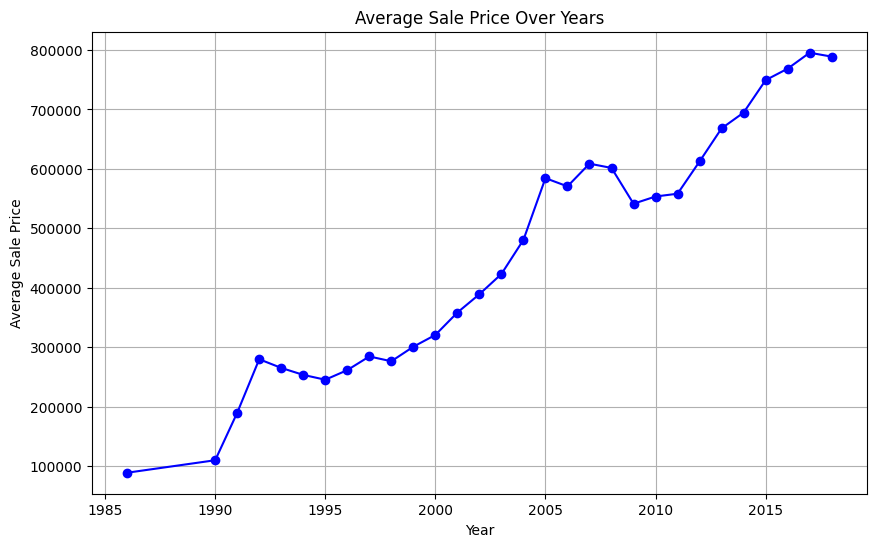

In [221]:
# Q4 Anaswers: (Add Cells as needed)

# Show the trend of average sale-price over years. (5 pts)

import matplotlib.pyplot as plt

# Group by 'SALEYEAR' and calculate the average sale price for each year
average_price_yearly = df.groupby('SALEYEAR')['PRICE'].mean()

# Plotting the trend of average sale price over years
plt.figure(figsize=(10, 6))
average_price_yearly.plot(kind='line', marker='o', color='blue')
plt.title('Average Sale Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Sale Price')
plt.grid(True)

In [222]:
df.groupby('SALEYEAR')['PRICE'].mean()

SALEYEAR
1986    89000.00
1990   110000.00
1991   189900.00
1992   279851.01
1993   265254.73
1994   253537.21
1995   245392.26
1996   261553.50
1997   284544.65
1998   276452.45
1999   300895.40
2000   320735.84
2001   358410.68
2002   389183.04
2003   423216.28
2004   480622.82
2005   584411.16
2006   570564.62
2007   608759.51
2008   601576.62
2009   541413.50
2010   553542.27
2011   558228.67
2012   612468.08
2013   668110.48
2014   694633.28
2015   749217.00
2016   768535.85
2017   795347.75
2018   788782.68
Name: PRICE, dtype: float64

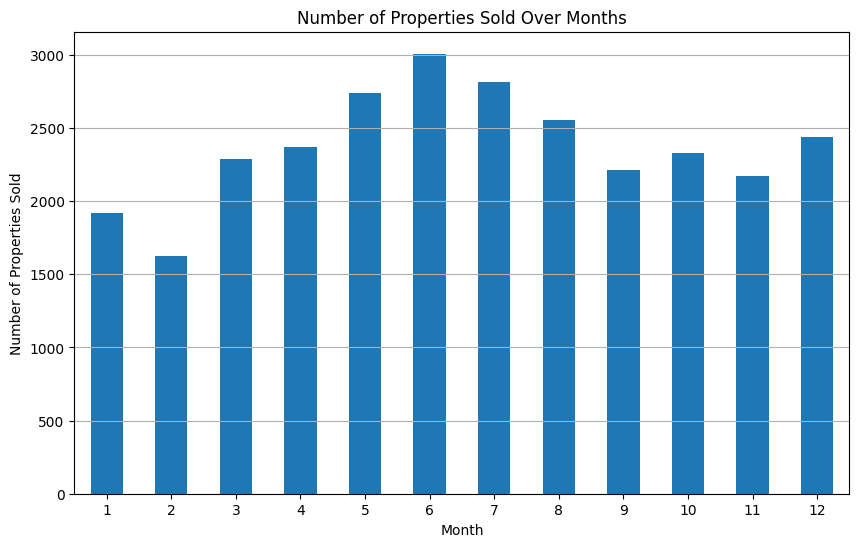

In [223]:
# Show the number of properties that have been sold over months. (5 pts)

import matplotlib.pyplot as plt

# Group by 'SALEMONTH' and count the number of properties sold in each month
properties_sold_monthly = df.groupby('SALEMONTH').size()

# Plotting the number of properties sold over months
plt.figure(figsize=(10, 6))
properties_sold_monthly.plot(kind='bar')
plt.title('Number of Properties Sold Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Properties Sold')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y')

In [224]:
group = df[['SALEMONTH', 'PRICE']].groupby('SALEMONTH').size()
group

SALEMONTH
1     1918
2     1623
3     2290
4     2367
5     2741
6     3008
7     2815
8     2557
9     2212
10    2332
11    2172
12    2437
dtype: int64

In [225]:
# Show the sum of sale price for all 4 quadrant in Washington D.C. (5 pts)

# Group by 'QUADRANT' and calculate the sum of sale prices for each quadrant
sum_sale_price_quadrant = df.groupby('QUADRANT')['PRICE'].sum()

# Display the sum of sale prices for each quadrant
print(sum_sale_price_quadrant)

QUADRANT
NE    4270421903.00
NW   10366872618.00
SE    2628718543.00
SW      59979357.00
Name: PRICE, dtype: float64


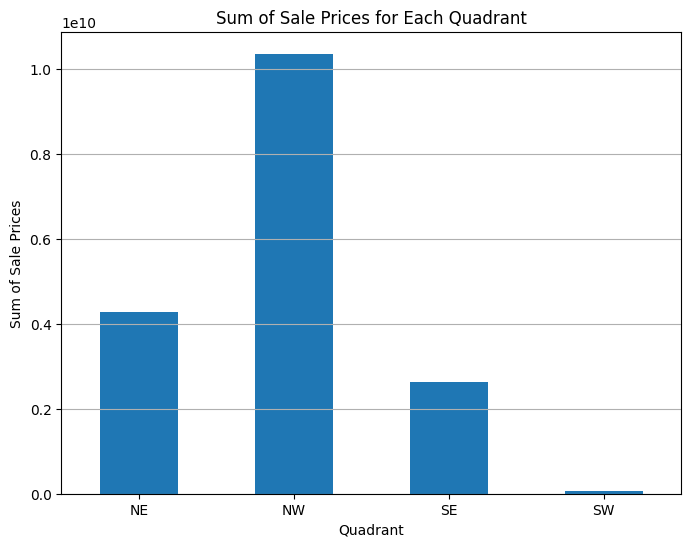

In [239]:
# Plotting the sum of sale prices for each quadrant
plt.figure(figsize=(8, 6))
sum_sale_price_quadrant.plot(kind='bar')
plt.title('Sum of Sale Prices for Each Quadrant')
plt.xlabel('Quadrant')
plt.ylabel('Sum of Sale Prices')
plt.xticks(rotation=0)
plt.grid(axis='y')

Text(0, 0.5, 'Average Sale Price')

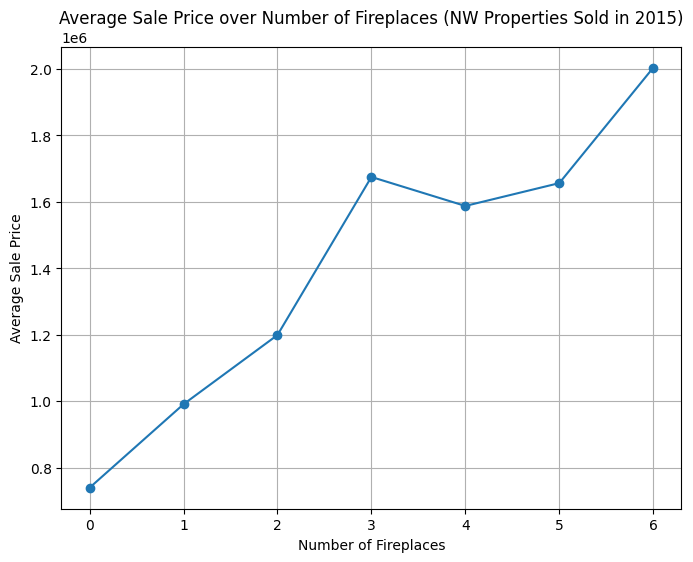

In [229]:
# Plot the average sale price over the number of fireplaces for properties that exist within NW and were sold in 2015. (5 pts)

# Filter data for properties within NW quadrant sold in 2015
nw_properties_2015 = df[(df['QUADRANT'] == 'NW') & (df['SALEYEAR'] == 2015)]

# Group by the number of fireplaces and calculate the average sale price
avg_price_fireplaces = nw_properties_2015.groupby('FIREPLACES')['PRICE'].mean()

# Plotting the average sale price over the number of fireplaces
plt.figure(figsize=(8, 6))
avg_price_fireplaces.plot(kind='line', marker='o')
plt.title('Average Sale Price over Number of Fireplaces (NW Properties Sold in 2015)')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Average Sale Price')

## Good Luck!